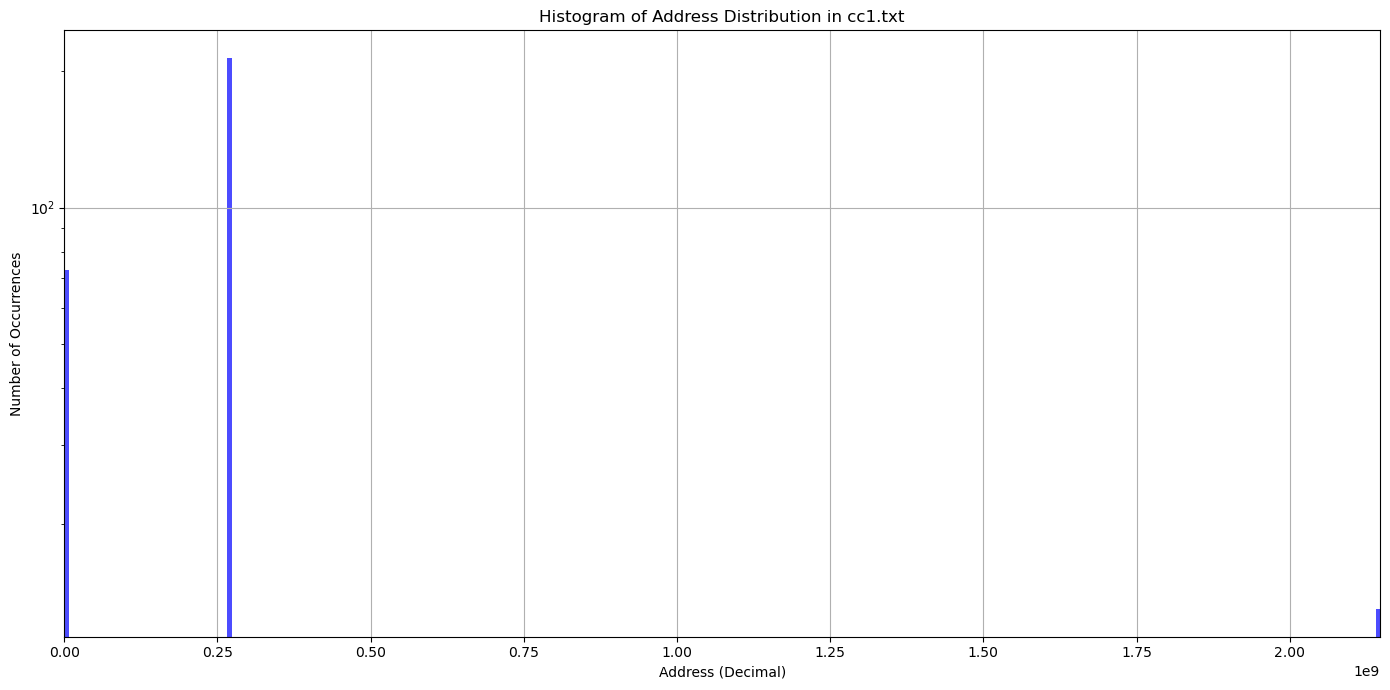

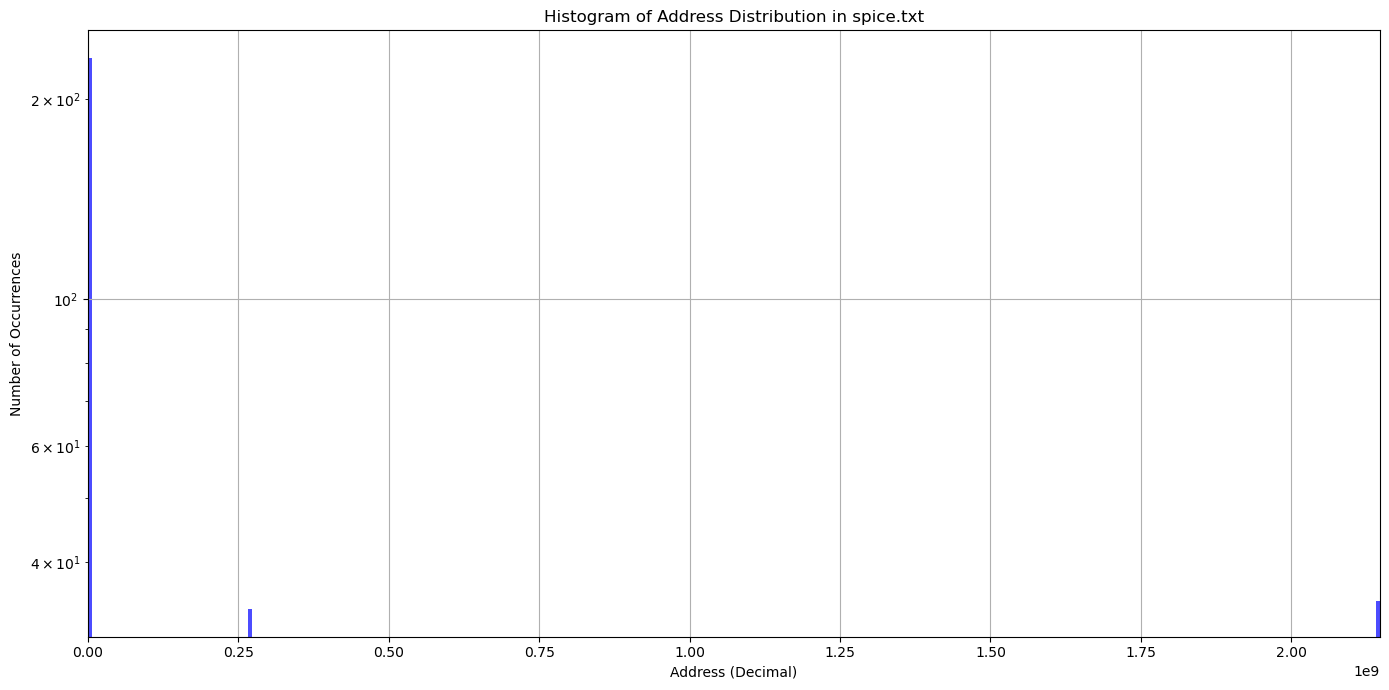

cc1.txt - Reads: 130655, Writes: 104513
spice.txt - Reads: 150699, Writes: 66538


In [1]:
#Name: Jen Tso Huang(Kerry)
#Date: 2024/1/28
#Description: This program is to plot the histograms and count the frequency of selected range of addresses.


import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def read_file(file_path):
    with open(file_path, 'r') as file:
        data = [line.strip().split() for line in file]
    return data

def plot_histogram(data, title, top_n_addresses=None):
    # Convert addresses to decimal and count occurrences
    address_counts = Counter(int(address, 16) for _, address in data)
    
    # If top_n_addresses is specified, get the top N most common addresses
    if top_n_addresses is not None and top_n_addresses < len(address_counts):
        top_addresses = address_counts.most_common(top_n_addresses)
    else:
        top_addresses = address_counts.items()

    # Sort the addresses by the number of occurrences in descending order
    sorted_top_addresses = sorted(top_addresses, key=lambda x: x[1], reverse=True)
    top_n_sorted_addresses, _ = zip(*sorted_top_addresses[:top_n_addresses])

    # The upper limit for the x-axis will be the largest address in the top_n_addresses
    x_upper_limit = max(top_n_sorted_addresses)

    # Create the bins up to the maximum address of the top_n_addresses
    bins = np.linspace(0, x_upper_limit, num=top_n_addresses if top_n_addresses else len(address_counts))

    plt.figure(figsize=(14, 7))
    # Use the top N addresses for the histogram data
    plt.hist(top_n_sorted_addresses, bins=bins, color='blue', alpha=0.7)
    plt.title(f'Histogram of Address Distribution in {title}')
    plt.xlabel('Address (Decimal)')
    plt.ylabel('Number of Occurrences')
    plt.grid(True)
    plt.yscale('log')  # Using a logarithmic scale for better visibility
    plt.xlim(0, x_upper_limit)  # Set the x-axis limit
    plt.tight_layout()
    plt.show()

def calculate_frequencies(data):
    read_count = sum(1 for op, _ in data if op == '0')
    write_count = sum(1 for op, _ in data if op == '1')
    return read_count, write_count

# Replace these with the actual paths to your files
cc1_file_path = '/Users/huangjentso/Desktop/School/Master24Spring/CS402/Assignment/HW1/cc1.txt'
spice_file_path = '/Users/huangjentso/Desktop/School/Master24Spring/CS402/Assignment/HW1/spice.txt'

# Rest of the script remains the same
cc1_data = read_file(cc1_file_path)
plot_histogram(cc1_data, 'cc1.txt', top_n_addresses=300)
cc1_read_count, cc1_write_count = calculate_frequencies(cc1_data)

spice_data = read_file(spice_file_path)
plot_histogram(spice_data, 'spice.txt', top_n_addresses=300)
spice_read_count, spice_write_count = calculate_frequencies(spice_data)

print(f"cc1.txt - Reads: {cc1_read_count}, Writes: {cc1_write_count}")
print(f"spice.txt - Reads: {spice_read_count}, Writes: {spice_write_count}")